##                                   Unsupervised Learning in CAR dataset

The data set was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multi-valued discrete and 4 continuous variables. 
Attribute Information:

Car Name – Name of the car    
Cyl – No of cylinders in the car – Multi-valued discrete    
Disp – Displacement – continuous  
Hp – Horsepower – continuous  
Wt – Weight – continuous  
Acc – Acceleration – continuous  
Yr – Model of the car – Multivalued discrete   
Mpg - Miles per gallon - continuous   
   
Steps to follow:
EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points  
Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points  
Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)   
Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)   

In [84]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
car=pd.read_csv('cars-dataset.csv')

In [4]:
car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
 car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


Here HP is showing type as object. We have to see why it is showing as object since it should be float. 

In [6]:
car['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Since it has ? in it, which is not a valid entry hence removing it with mean of the column. 

In [7]:
car[car['hp']=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [8]:
car['hp'].replace('?',np.nan, inplace=True)

In [9]:
car[car['hp']=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg


In [10]:
car[car['hp'].isna()==True]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


Since the datatype for hp is still object, we need to change type to int. 

In [12]:
car['hp']=car['hp'].astype('float64')

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [14]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [15]:
car['hp'].fillna(value=np.mean(car['hp']),inplace=True)

In [16]:
car[car['hp'].isna()==True]

,car name,cyl,disp,hp,wt,acc,yr,mpg


In [17]:
car.iloc[[32,126,330,336,354,374],:]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,104.469388,2046,19.0,71,25.0
126,ford maverick,6,200.0,104.469388,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,104.469388,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,104.469388,2905,14.3,80,23.6
354,renault 18i,4,100.0,104.469388,2320,15.8,81,34.5
374,amc concord dl,4,151.0,104.469388,3035,20.5,82,23.0


We can see here that all the NaN values in HP has been replaced by mean of the column. 

In [18]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


If we see the describe of each feature,   
Cyl: we have cars which are ranging from 3 cylender to 8 cylenders maximum. But if we see the distribution, it is positively skewed as mean has higher value than median. Most of the cars has 4 cylenders as both 25% and 50% are showing 4 cylenders only.  
Disp: Displacement is also right skewed. Also dispersion between quartiles are high towards the end which shows outliers.   
hp: hp is also right skewed, with outliers at the high end.  
wt: wt is also positively skweed with outliers.  
acc: this is also on the same line where it is right skewed with outliers.   
yr: yr looks normally distributed here.   
mpg: mpg is also normally distributed with few outliers at higher end.   

###### Lets visualize the distribution and relation among them

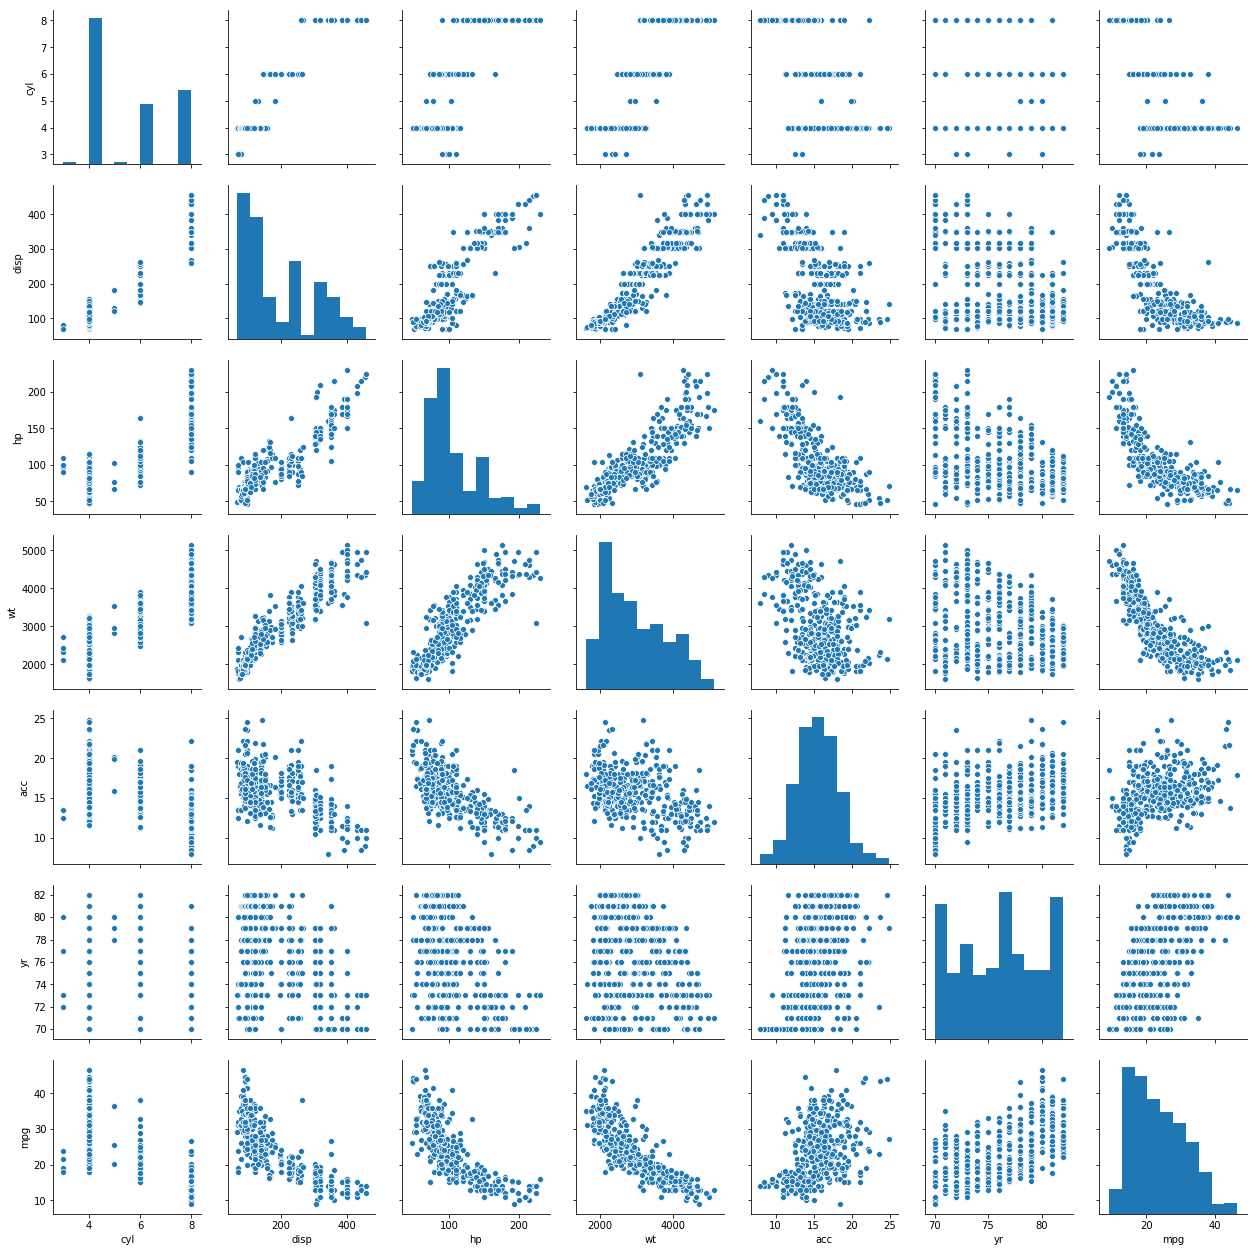

In [19]:
sns.pairplot(car)

Above acatter plots are showing that features are have co relation among them. If we see, horse power is slightly positively correlated to disposition. Simillarly weight, disposition and hp are also positively corelated. Miles per gallon is negatively corelated with disp, hp and wt which infers that more the weight, more the horse power needed, and more the dispostion but it all combined affect the milleage.   
If I see the scatter plots of each variables, it infers that there could be around 4 clusters in the dataset. 


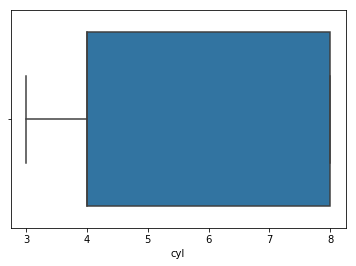

In [20]:
sns.boxplot(car['cyl'])

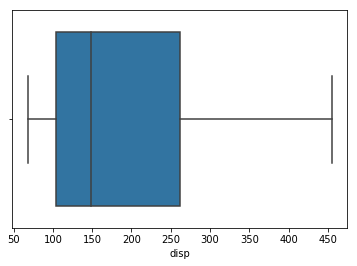

In [21]:
sns.boxplot(car['disp'])

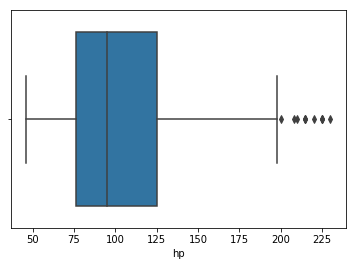

In [22]:
sns.boxplot(car['hp'])

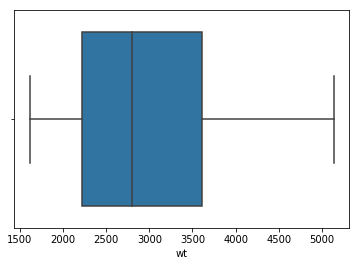

In [23]:
sns.boxplot(car['wt'])

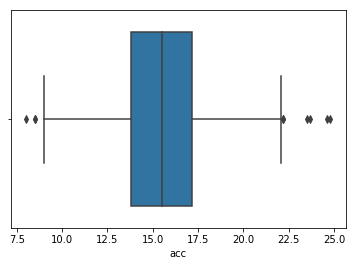

In [24]:
sns.boxplot(car['acc'])

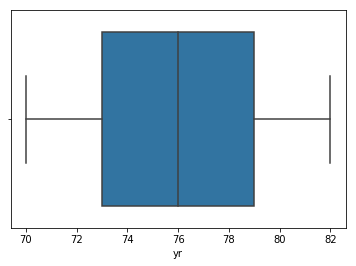

In [25]:
sns.boxplot(car['yr'])

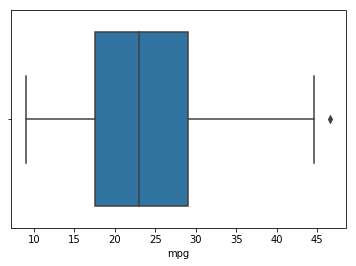

In [26]:
sns.boxplot(car['mpg'])

If we see here, hp and acc are having many outliers. We need to cluster the data to minimize outliers.

###### Setting up data for clustering ,as car name is not an useful variable hence will drop it. And mpg is target variable hence will drop that as well for clustering.

In [27]:
X=car.drop(['car name','mpg'],axis=1)

In [28]:
X.shape

(398, 6)

In [29]:
X.head()

,cyl,disp,hp,wt,acc,yr
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [30]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(X_scaled).describe()

C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,4.287469e-16,-9.902743e-17,8.982206e-17,-8.837152e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.532571e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-8.563206e-01,-8.563178e-01,-7.462258e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-8.563206e-01,-4.314040e-01,-2.482070e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,1.498191e+00,6.584879e-01,5.381385e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,1.498191e+00,2.511784e+00,3.290348e+00,2.565185e+00,3.351912e+00,1.621983e+00


In [31]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 10
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, init='k-means++')
    clusters.fit(X_scaled)
    labels = clusters.labels_                        # capture the cluster lables
    centroids = clusters.cluster_centers_            # capture the centroids
    cluster_errors.append(clusters.inertia_)         # capture the intertia
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [32]:
clusters_df

,num_clusters,cluster_errors
0,2,1069.715267
1,3,808.948714
2,4,641.795074
3,5,564.177062
4,6,495.716819
5,7,449.314323
6,8,407.270060
7,9,376.423647


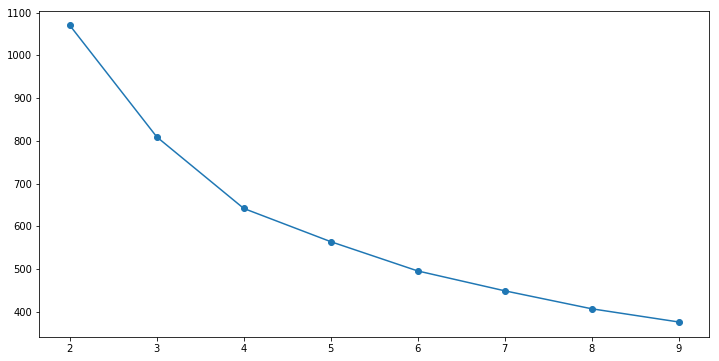

In [33]:
# Elbow plot to identify number of clusters
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')

As per the elbow plot, ideal cluster number looks like 4. Hence we will create final model using K =4. 

In [56]:
clusters = KMeans(n_clusters = 4, init='k-means++')
clusters.fit(X_scaled)
labels = clusters.labels_                        # capture the cluster lables
centroids = clusters.cluster_centers_            # capture the centroids
cluster_errors = clusters.inertia_

In [35]:
print('centroids:',centroids)

centroids: [[-0.84667093 -0.78000886 -0.68867275 -0.73705417  0.35055852  1.04712198]
 [ 1.49819126  1.50392292  1.51828193  1.40409797 -1.0861486  -0.68832385]
 [-0.80622457 -0.80023472 -0.59747008 -0.79057227  0.34994431 -0.78626705]
 [ 0.43464756  0.32970897 -0.02884361  0.3664681   0.30039844  0.12343934]]


In [36]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled["GROUP"] = labels

In [48]:
X_scaled.groupby(["GROUP"]).count()

,0,1,2,3,4,5
GROUP,,,,,,
0,122,122,122,122,122,122
1,94,94,94,94,94,94
2,94,94,94,94,94,94
3,88,88,88,88,88,88


In [45]:
X_scaled.head()

,0,1,2,3,4,5,GROUP
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,1
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,1
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,1
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,1
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,1


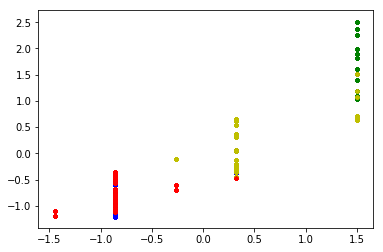

In [54]:
colors = ['r', 'g', 'b', 'y']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_scaled.loc[X_scaled['GROUP'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

In [39]:
X.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')

In [40]:
X = pd.DataFrame(X)
X["GROUP"] = labels

In [41]:
X["GROUP"].value_counts()

0    122
2     94
1     94
3     88
Name: GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B99AD1FD0>,
      dtype=object)

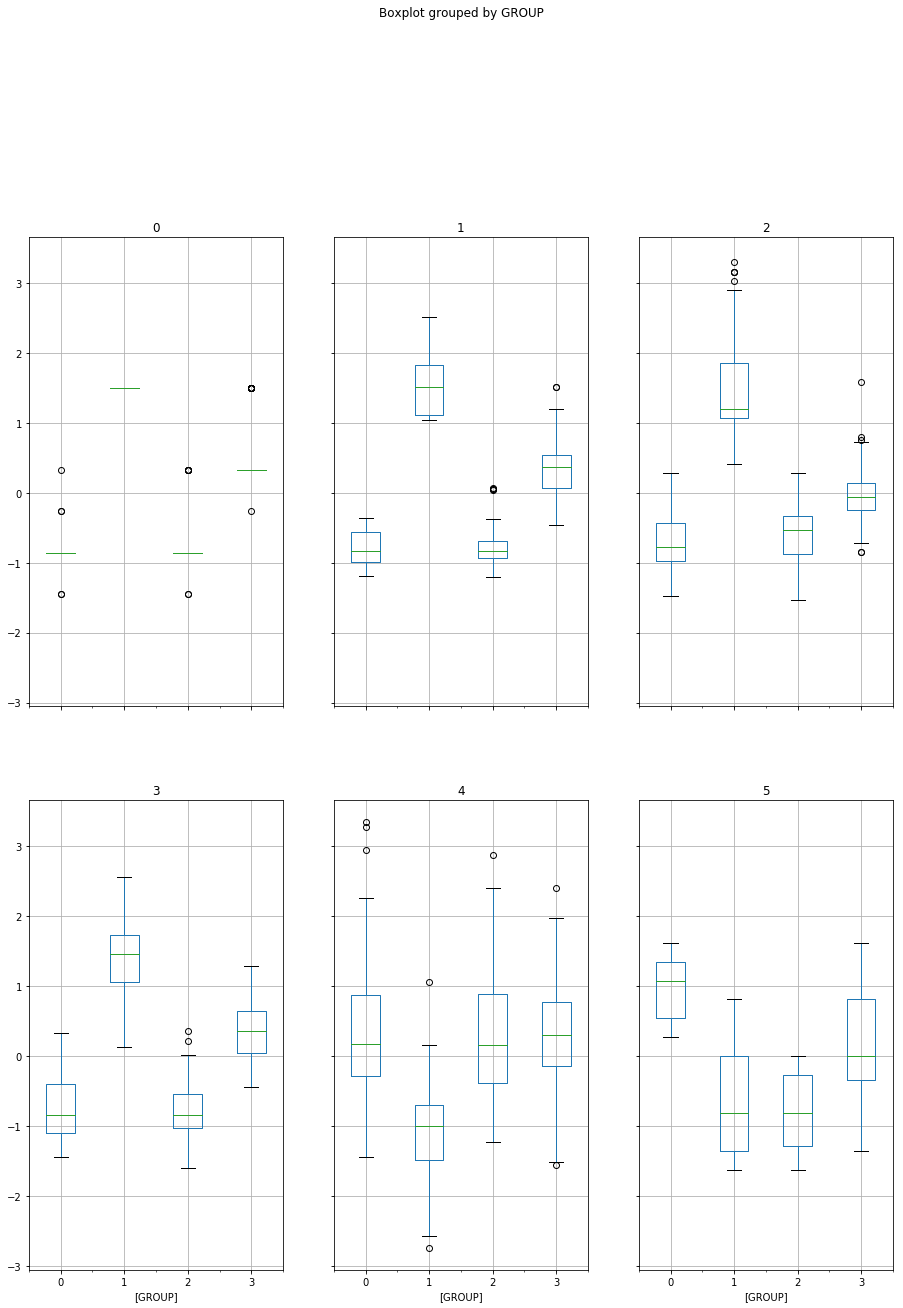

In [55]:
X_scaled.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

By all these visualizations, it looks like two of the clusters are kind of overlapping. We can go with 3 clusters. 

In [57]:
clusters = KMeans(n_clusters = 3, init='k-means++')
clusters.fit(X_scaled)
labels = clusters.labels_                        # capture the cluster lables
centroids = clusters.cluster_centers_            # capture the centroids
cluster_errors = clusters.inertia_

In [58]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled["GROUP"] = labels

In [59]:
X_scaled.groupby(["GROUP"]).count()

,0,1,2,3,4,5
GROUP,,,,,,
0,179,179,179,179,179,179
1,122,122,122,122,122,122
2,97,97,97,97,97,97


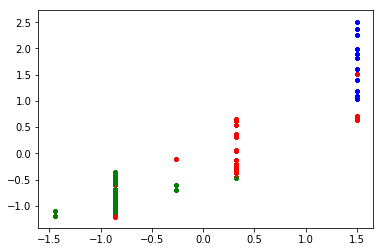

In [60]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_scaled.loc[X_scaled['GROUP'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

In [63]:
X=X.drop("GROUP", axis=1)
X = pd.DataFrame(X)
X["group"] = labels

In [64]:
X.groupby(["group"]).count()

,cyl,disp,hp,wt,acc,yr
group,,,,,,
0,179,179,179,179,179,179
1,122,122,122,122,122,122
2,97,97,97,97,97,97


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B9B445E10>,
      dtype=object)

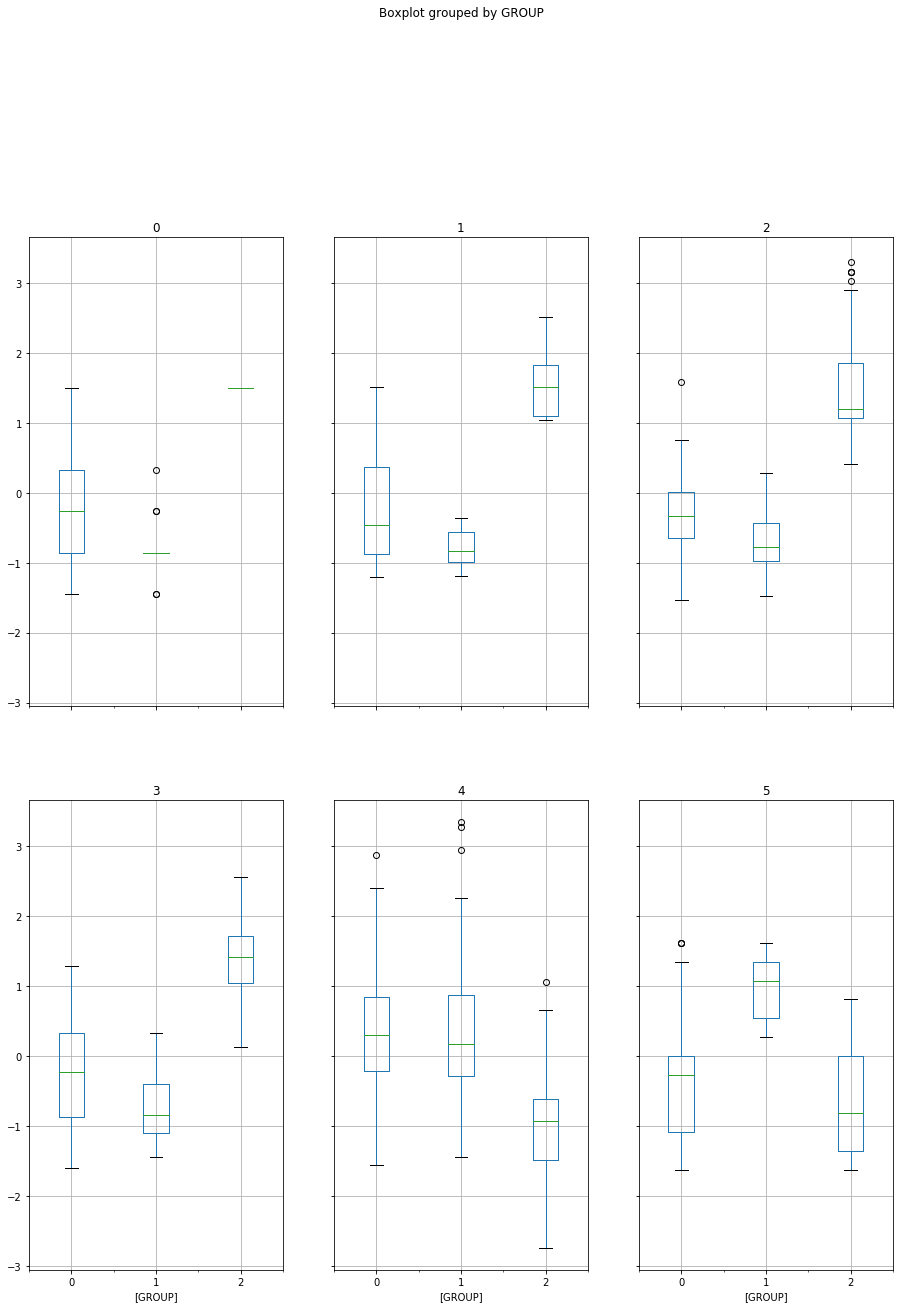

In [61]:
X_scaled.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

Since 3 clusters look good, we will go with this for further EDA on each clusters.

###### Regression for group1

In [70]:
car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [68]:
#Combining Y with X again to get full dataset with cluster groups.
X['mpg']=car['mpg']

In [69]:
X.head()

,cyl,disp,hp,wt,acc,yr,group,mpg
0,8,307.0,130.0,3504,12.0,70,2,18.0
1,8,350.0,165.0,3693,11.5,70,2,15.0
2,8,318.0,150.0,3436,11.0,70,2,18.0
3,8,304.0,150.0,3433,12.0,70,2,16.0
4,8,302.0,140.0,3449,10.5,70,2,17.0


In [73]:
group1=X[X['group']==0]
group2=X[X['group']==1]
group3=X[X['group']==2]

In [74]:
print('group1 shape: ',group1.shape)
print('group2 shape: ',group2.shape)
print('group3 shape: ',group3.shape)

group1 shape:  (179, 8)
group2 shape:  (122, 8)
group3 shape:  (97, 8)


Now we will perform linear regression model to predict the mpg value for each group

###### Regression for group1

In [75]:
X1=group1.drop(['mpg'],axis=1)

In [76]:
y1=group1['mpg']

In [77]:
print(X1.shape)
print(y1.shape)

(179, 7)
(179,)


In [79]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state=10)

In [80]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(134, 7)
(134,)
(45, 7)
(45,)


In [81]:
lr1=LinearRegression()
lr1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
print('Accuracy score:' ,lr1.score(X1_test,y1_test))

Accuracy score: 0.5016029622496135


In [98]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr1.coef_[idx]))

The coefficient for cyl is 0.9343916438000834
The coefficient for disp is -0.01669855426261633
The coefficient for hp is -0.016287850630166217
The coefficient for wt is -0.006639928877438515
The coefficient for acc is -0.001387122977147033
The coefficient for yr is 0.4494757256866149
The coefficient for group is 0.0


###### Regression for group2

In [102]:
X2=group2.drop(['mpg'],axis=1)

In [103]:
y2=group2['mpg']

In [104]:
print(X2.shape)
print(y2.shape)

(122, 7)
(122,)


In [105]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state=10)

In [106]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(91, 7)
(91,)
(31, 7)
(31,)


In [107]:
lr2=LinearRegression()
lr2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
print('Accuracy score:' ,lr2.score(X2_test, y2_test))

Accuracy score: 0.5373728180696475


In [109]:
for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr2.coef_[idx]))

The coefficient for cyl is 2.5043964166247554
The coefficient for disp is -0.037761695187614
The coefficient for hp is -0.06975422301504917
The coefficient for wt is -0.008327452026642734
The coefficient for acc is 0.28918194731292823
The coefficient for yr is 1.1197767362874484
The coefficient for group is 0.0


###### Regression for group3

In [110]:
X3=group3.drop(['mpg'],axis=1)

In [111]:
y3=group3['mpg']

In [112]:
print(X3.shape)
print(y3.shape)

(97, 7)
(97,)


In [113]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,random_state=10)

In [119]:
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(72, 7)
(72,)
(25, 7)
(25,)


In [114]:
lr3=LinearRegression()
lr3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
print('Accuracy score:', lr3.score(X3_test,y3_test))

Accuracy score: 0.44935496553568854


In [118]:
for idx, col_name in enumerate(X3_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr3.coef_[idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.01349543306235162
The coefficient for hp is -0.02962928373065214
The coefficient for wt is -0.002134717421716366
The coefficient for acc is -0.1168061917009633
The coefficient for yr is 0.4171985033978245
The coefficient for group is 0.0
